In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns


warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [135]:
edu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Year: from 1992 - 2017
state & local revenue is roughly equal, and roughly 6x higher than federal revenue
all revenue and expenditure values have long right tails



2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

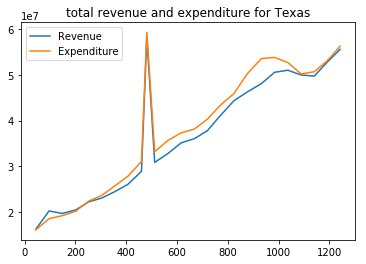

In [130]:
texas_rev = (useducation_df.loc[useducation_df.STATE == "TEXAS", "YEAR"], 
             useducation_df.loc[useducation_df.STATE == "TEXAS", "TOTAL_REVENUE"])

sns.lineplot(data=edu_df.loc[edu_df.STATE=='TEXAS','TOTAL_REVENUE'], label='Revenue')
sns.lineplot(data=edu_df.loc[edu_df.STATE=='TEXAS','TOTAL_EXPENDITURE'], label='Expenditure')

plt.title("total revenue and expenditure for Texas")
plt.legend()
plt.show()


Texas education has been running at a deficit since at least 1994, when expenditures surpassed revenue and stayed that way. There was a huge spike in revenue and spending in 2001. 

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [136]:
txscores_df = edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].dropna()


print("Difference between math and reading scores (grade 4)")
print(txscores_df['AVG_MATH_4_SCORE'] - txscores_df['AVG_READING_4_SCORE'])
print("Difference between math and reading scores (grade 8)")
print(txscores_df['AVG_MATH_8_SCORE'] - txscores_df['AVG_READING_8_SCORE'])



Difference between math and reading scores (grade 4)
252     11.850907
460     15.733788
616     22.497916
719     23.257092
824     22.735447
932     21.606351
1036    22.780949
1140    25.016692
1242    26.059559
1484    26.065177
dtype: float64
Difference between math and reading scores (grade 8)
252      6.607836
460      6.755989
616     10.486543
719     21.471485
824     20.160498
932     15.984540
1036    25.227153
1140    26.749917
1242    16.713675
1484    20.273657
dtype: float64


The math scores were consistently highger than the reading scores. 

4. What are the distributions of the math and reading scores in the sample?

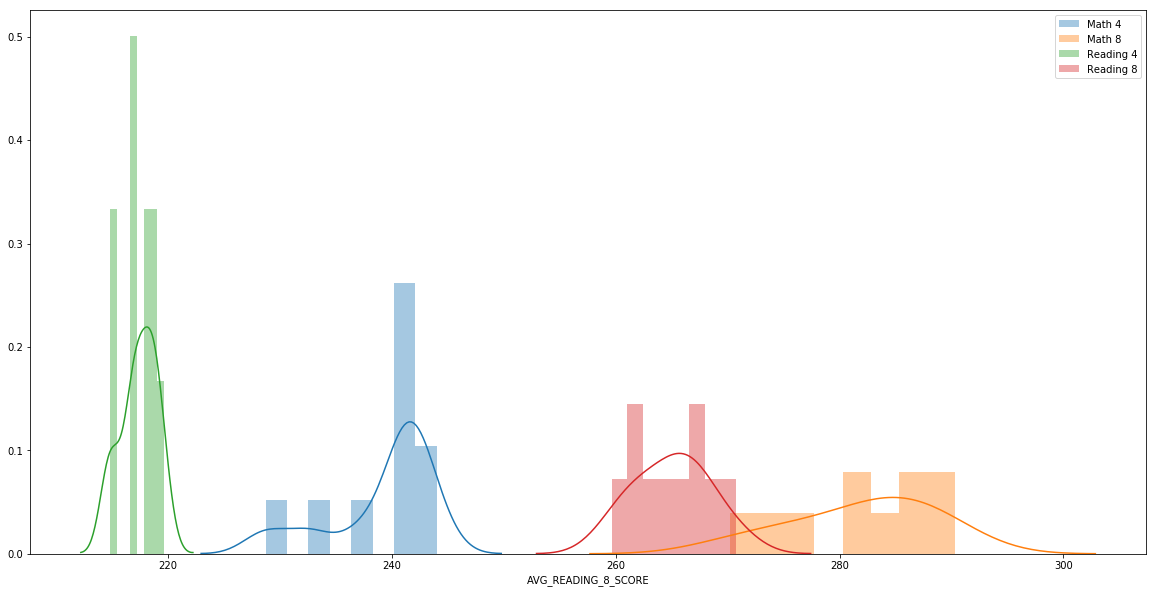

In [97]:
plt.figure(figsize=(20,10))
sns.distplot(txscores_df['AVG_MATH_4_SCORE'], bins=8, label='Math 4')
sns.distplot(txscores_df['AVG_MATH_8_SCORE'], bins=8, label='Math 8')
sns.distplot(txscores_df['AVG_READING_4_SCORE'], bins=8, label='Reading 4')
sns.distplot(txscores_df['AVG_READING_8_SCORE'], bins=8, label='Reading 8')
plt.legend()
plt.show()

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

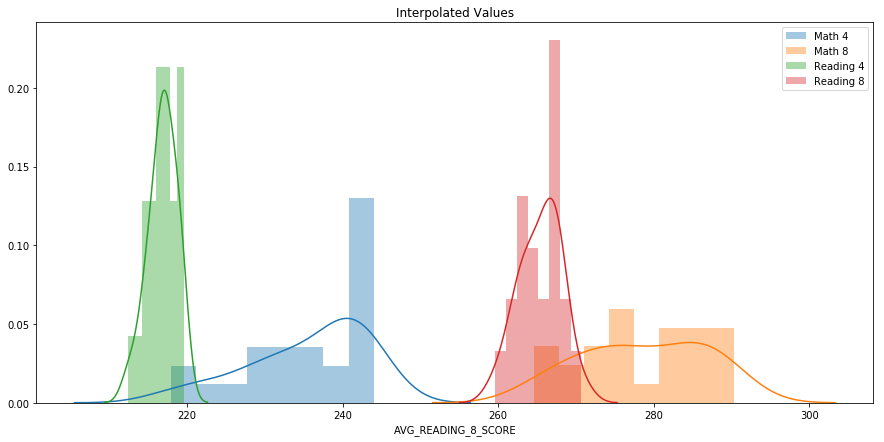

In [128]:
txscores_inter_df = edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].interpolate()
txscores_mean_df = edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].fillna(edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].mean())
txscores_median_df = edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].fillna(edu_df.loc[edu_df.STATE=='TEXAS','AVG_MATH_4_SCORE':'AVG_READING_8_SCORE'].median())


readinginter = txscores_inter_df['AVG_READING_8_SCORE'].dropna()
plt.figure(figsize=(15,7))
sns.distplot(txscores_inter_df['AVG_MATH_4_SCORE'], bins=8, label='Math 4')
sns.distplot(txscores_inter_df['AVG_MATH_8_SCORE'], bins=8, label='Math 8')
sns.distplot(txscores_inter_df['AVG_READING_4_SCORE'].dropna(), bins=8, label='Reading 4')
sns.distplot(readinginter, bins=8, label='Reading 8')
plt.title("Interpolated Values")
plt.legend()
plt.show()





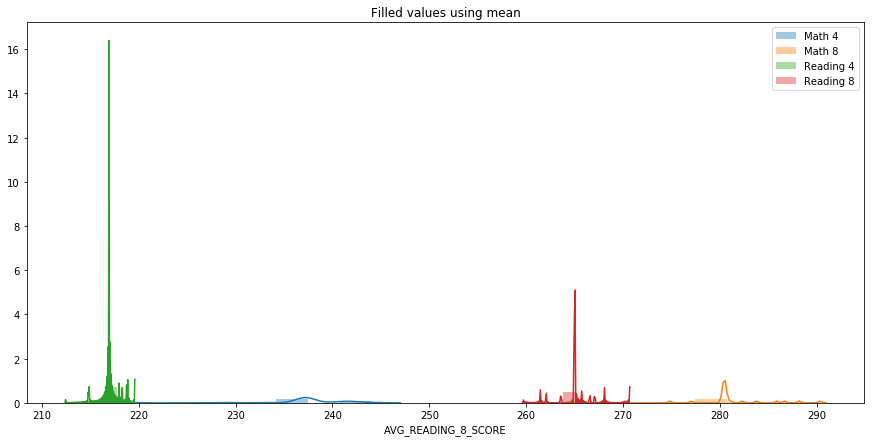

In [124]:

readingmean = txscores_mean_df['AVG_READING_8_SCORE']
plt.figure(figsize=(15,7))
sns.distplot(txscores_mean_df['AVG_MATH_4_SCORE'], bins=8, label='Math 4')
sns.distplot(txscores_mean_df['AVG_MATH_8_SCORE'], bins=8, label='Math 8')
sns.distplot(txscores_mean_df['AVG_READING_4_SCORE'].dropna(), bins=8, label='Reading 4')
sns.distplot(readingmean, bins=8, label='Reading 8')
plt.title("Filled values using mean")
plt.legend()
plt.show()

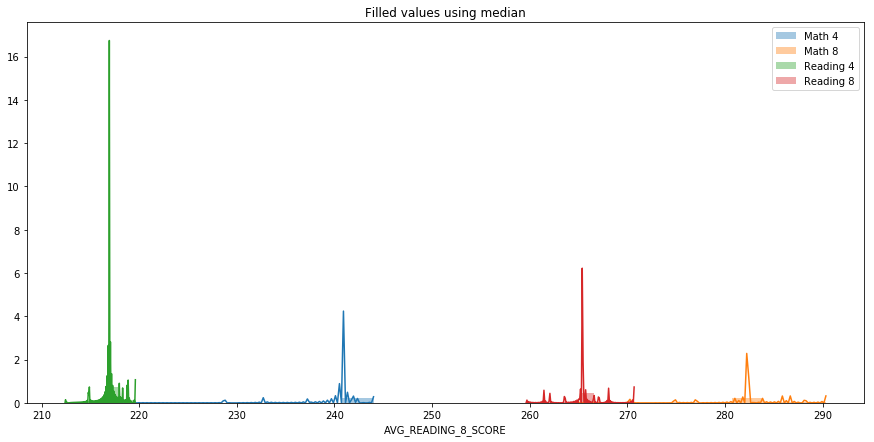

In [126]:
readingmedian = txscores_median_df['AVG_READING_8_SCORE']
plt.figure(figsize=(15,7))
sns.distplot(txscores_median_df['AVG_MATH_4_SCORE'], bins=8, label='Math 4')
sns.distplot(txscores_median_df['AVG_MATH_8_SCORE'], bins=8, label='Math 8')
sns.distplot(txscores_median_df['AVG_READING_4_SCORE'].dropna(), bins=8, label='Reading 4')
sns.distplot(readingmedian, bins=8, label='Reading 8')
plt.legend()
plt.title("Filled values using median")
plt.show()

Filling values using median and mean resulted in huge spikes in frequency at that value, since there were so many missing values. In this case it's better to drop the values or use interpolation. 